## creating networkx graph from pandas data_frame


In [2]:
import networkx as nx
import pandas as pd


edgelist = pd.read_csv("/Users/sim_table.csv")

In [3]:
edgelist.head()

,Unnamed: 0,Gensim_LSI,Word2vec_similarity_score,cosine_similarity_score
0,australian_number,0.685278,0.718191,1.000000
1,australian_round,0.928121,0.715879,1.000000
2,federer_australian,0.949249,0.724304,1.000000
3,federer_number,0.874801,0.727110,1.000000
4,federer_open,0.976386,0.722711,0.228313


In [20]:
# create empty graph
g1 = nx.Graph()

In [15]:
# removing column
concepts = edgelist['Unnamed: 0']
edgelist['concepts'] = concepts
edgelist.drop(columns='Unnamed: 0', inplace = True)

In [16]:
edgelist.head()

,Gensim_LSI,Word2vec_similarity_score,cosine_similarity_score,concepts
0,0.685278,0.718191,1.000000,australian_number
1,0.928121,0.715879,1.000000,australian_round
2,0.949249,0.724304,1.000000,federer_australian
3,0.874801,0.727110,1.000000,federer_number
4,0.976386,0.722711,0.228313,federer_open


In [17]:
nodes1 = []
nodes2 = []
for i in concepts:
    node1, node2 = i.split('_')
    nodes1.append(node1)
    nodes2.append(node2)
    

In [18]:
edgelist['Nodes1'] = nodes1
edgelist['Nodes2'] = nodes2
len(nodes2)

36

In [19]:
edgelist.head()

,Gensim_LSI,Word2vec_similarity_score,cosine_similarity_score,concepts,Nodes1,Nodes2
0,0.685278,0.718191,1.000000,australian_number,australian,number
1,0.928121,0.715879,1.000000,australian_round,australian,round
2,0.949249,0.724304,1.000000,federer_australian,federer,australian
3,0.874801,0.727110,1.000000,federer_number,federer,number
4,0.976386,0.722711,0.228313,federer_open,federer,open


In [33]:
print g1.number_of_nodes()
print g1.number_of_edges()

edgelist['concepts'][0]
node1, node2 = (edgelist['concepts'][0]).split('_')


node_len = g1.number_of_nodes()
for i in xrange(node_len):
    if edgelist['Gensim_LSI'][i] > 0.6:
        node1, node2 = (edgelist['concepts'][i]).split('_')
        g1.add_nodes_from([node1, node2])
        w = edgelist['Gensim_LSI'][i]
        g1.add_edge(node1, node2, weight= w)
       
    
    
print g1.nodes
print g1.edges

9
7
['number', 'round', 'henman', 'seed', 'grand', 'australian', 'open', 'federer', 'williams']
[('number', 'australian'), ('number', 'federer'), ('number', 'grand'), ('round', 'australian'), ('round', 'federer'), ('australian', 'federer'), ('open', 'federer')]


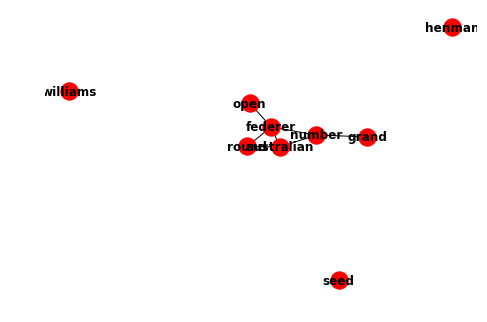

In [36]:
import matplotlib.pyplot as plt

nx.draw(g1, with_labels=True, font_weight='bold')


In [37]:
print g1.degree(['number'])
print g1.degree['number']
print g1.degree()
deg_list = g1.degree()

[('number', 3)]
3
[('number', 3), ('round', 2), ('henman', 0), ('seed', 0), ('grand', 1), ('australian', 3), ('open', 1), ('federer', 4), ('williams', 0)]


In [38]:
degree_dict = dict(deg_list)
print degree_dict
concepts = dict(deg_list).keys()
concepts

{'number': 3, 'henman': 0, 'seed': 0, 'grand': 1, 'australian': 3, 'open': 1, 'round': 2, 'williams': 0, 'federer': 4}


['number',
 'henman',
 'seed',
 'grand',
 'australian',
 'open',
 'round',
 'williams',
 'federer']

In [39]:
# remove node which has no edges based on degree
for node in degree_dict:
    if degree_dict[node] == 0:
        g1.remove_node(node)
        
    

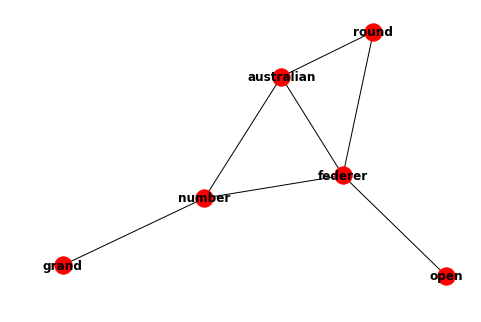

In [40]:
nx.draw(g1, with_labels=True, font_weight='bold')
